In [7]:
pip install pandas numpy seaborn scikit-learn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
df = pd.read_csv('../data/raw/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
print("Column Names:")
for i, j in enumerate(df.columns, 1):
    print(f"{i}. {j}")

Column Names:
1. price
2. area
3. bedrooms
4. bathrooms
5. stories
6. mainroad
7. guestroom
8. basement
9. hotwaterheating
10. airconditioning
11. parking
12. prefarea
13. furnishingstatus


In [11]:
binary_cols = [
    'mainroad','guestroom','basement',
    'hotwaterheating','airconditioning','prefarea'
]
df[binary_cols] = df[binary_cols].replace({'yes':1,'no':0}).astype(int)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    str  
dtypes: int64(12), str(1)
memory usage: 55.5 KB


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [14]:
X = df.drop('price', axis=1)
y = df['price'] 
X = pd.get_dummies(X, drop_first=True)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [16]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
y_pred = model.predict(X_test)


In [19]:
r2 = r2_score(y_test, y_pred)
r2

0.6529242642153174

In [20]:
print("Train R2:", model.score(X_train, y_train))
print("Test R2 :", model.score(X_test, y_test))


Train R2: 0.6859438988560158
Test R2 : 0.6529242642153174


In [21]:
print("Accuracy:", r2 * 100, "%")


Accuracy: 65.29242642153173 %


In [22]:
mae=mean_absolute_error(y_test, y_pred)
mae

970043.4039201644

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(1324506.9600914407)

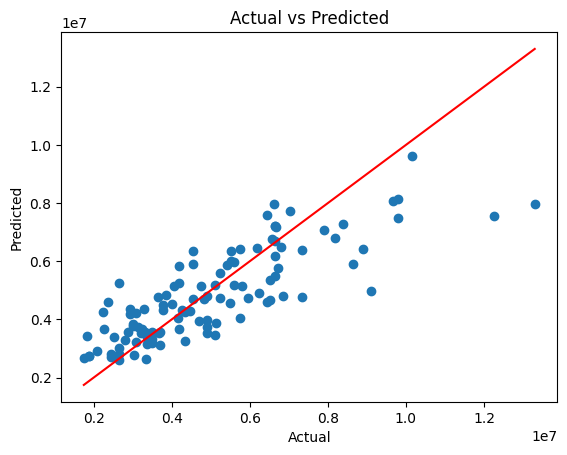

In [24]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


In [25]:
fea_imp = pd.Series(model.coef_, index=X.columns)
fea_imp.sort_values(ascending=False)

bathrooms                          521879.027748
area                               519552.416340
airconditioning                    365157.393851
stories                            349251.438906
prefarea                           266656.351993
parking                            192005.953667
basement                           187067.803214
hotwaterheating                    149862.702991
mainroad                           128498.628215
guestroom                           88768.667686
bedrooms                            57349.559419
furnishingstatus_semi-furnished    -62837.321865
furnishingstatus_unfurnished      -192015.917982
dtype: float64

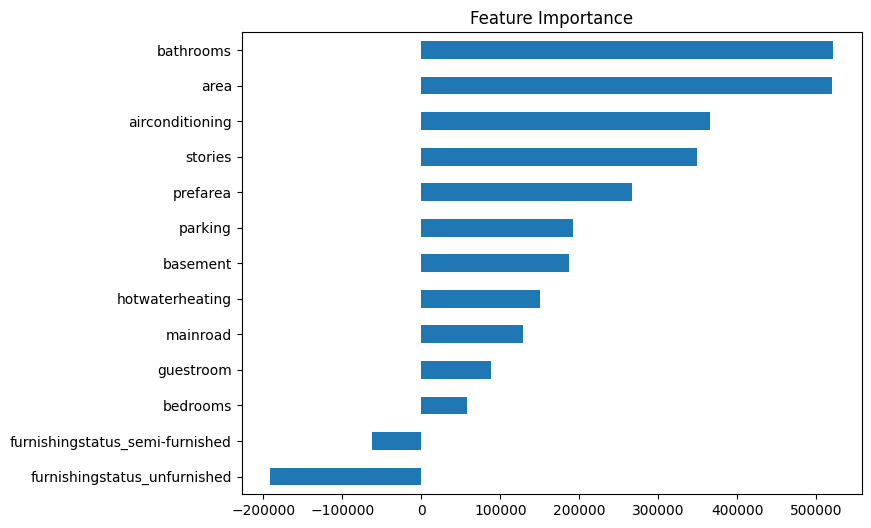

In [26]:
importance = pd.Series(fea_imp, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

In [27]:
rf = RandomForestRegressor( n_estimators=200,
    random_state=42)
rf.fit(X_train, y_train)

y_pred_rf= rf.predict(X_test)


In [28]:
print(r2_score(y_test, y_pred_rf))

0.612777423507864


In [29]:
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("MSE :", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

MAE : 1014679.1202599389
MSE : 1957243713855.9062
RMSE: 1399015.265769429
R2 Score: 0.612777423507864


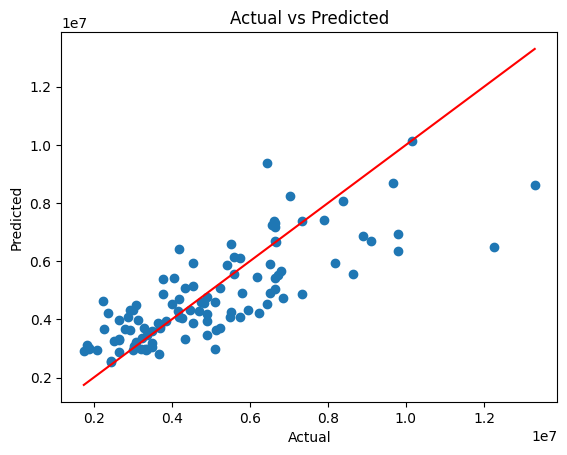

In [30]:
plt.scatter(y_test, y_pred_rf)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


In [31]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=False)

area                               0.467809
bathrooms                          0.152635
airconditioning                    0.060260
parking                            0.057557
stories                            0.057045
bedrooms                           0.047544
furnishingstatus_unfurnished       0.036974
basement                           0.032418
prefarea                           0.028316
hotwaterheating                    0.018333
guestroom                          0.017916
furnishingstatus_semi-furnished    0.013178
mainroad                           0.010015
dtype: float64

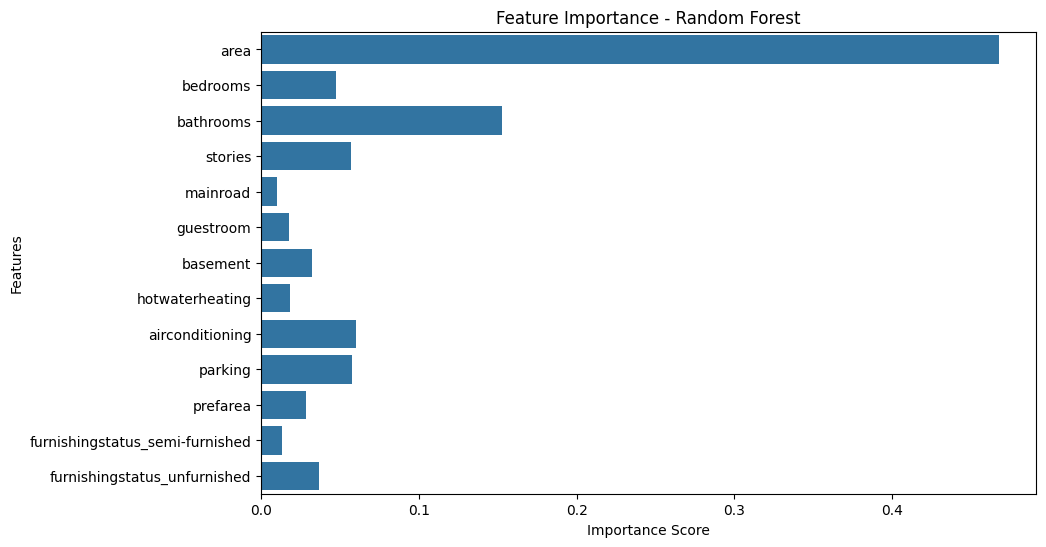

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.show()

In [33]:
import joblib

joblib.dump(rf, "../app/house_price_model.pkl")
joblib.dump(list(X.columns), "../app/model_columns.pkl")

['../app/model_columns.pkl']